In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [215]:
df=pd.read_csv('Social_Network_Ads.csv')

In [217]:
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [219]:
df.tail(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [221]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [223]:
df.duplicated().sum()

0

In [225]:
df=df.drop(columns=['User ID','Gender'])

In [227]:
df.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [229]:
df.tail(5)

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [231]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [233]:
x=df.drop('Purchased',axis=1)
y=df['Purchased']

In [235]:
x.columns

Index(['Age', 'EstimatedSalary'], dtype='object')

In [237]:
y.name

'Purchased'

In [239]:
x.ndim

2

In [241]:
y.ndim

1

In [243]:
df.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


we nedd to do feature scaling between age and EstimatedSalary

In [246]:
df.shape

(400, 3)

In [248]:
from sklearn.preprocessing import StandardScaler

In [250]:
sc=StandardScaler()

In [252]:
sc.fit(x)

# x=pd.DataFrame(sc.transform(x),columns=x.columns)
df[['Age','EstimatedSalary']]= sc.transform(x)

In [254]:
df.head(5)

,Age,EstimatedSalary,Purchased
0,-1.781797,-1.490046,0
1,-0.253587,-1.460681,0
2,-1.113206,-0.785290,0
3,-1.017692,-0.374182,0
4,-1.781797,0.183751,0


In [256]:
from sklearn.model_selection import train_test_split

In [258]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [260]:
print(x_test.shape)
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)

(120, 2)
(280, 2)
(280,)
(120,)


In [262]:
df.tail(5)

,Age,EstimatedSalary,Purchased
395,0.797057,-0.844019,1
396,1.274623,-1.372587,1
397,1.179110,-1.460681,1
398,-0.158074,-1.078938,0
399,1.083596,-0.990844,1


In [264]:
x.columns

Index(['Age', 'EstimatedSalary'], dtype='object')

In [266]:
x.ndim

2

In [268]:
y.name

'Purchased'

In [270]:
from sklearn.tree import DecisionTreeClassifier

In [544]:
dt=DecisionTreeClassifier(max_depth=4)


In [546]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [548]:
dt.score(x_test,y_test)*100

92.5

In [550]:
dt.score(x_train,y_train)*100

92.85714285714286

In [552]:
dt.predict([[19,19000]])

C:\Users\mishr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [554]:
x.columns

Index(['Age', 'EstimatedSalary'], dtype='object')

In [556]:
x.head(5)

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [558]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [560]:
from sklearn.tree import plot_tree

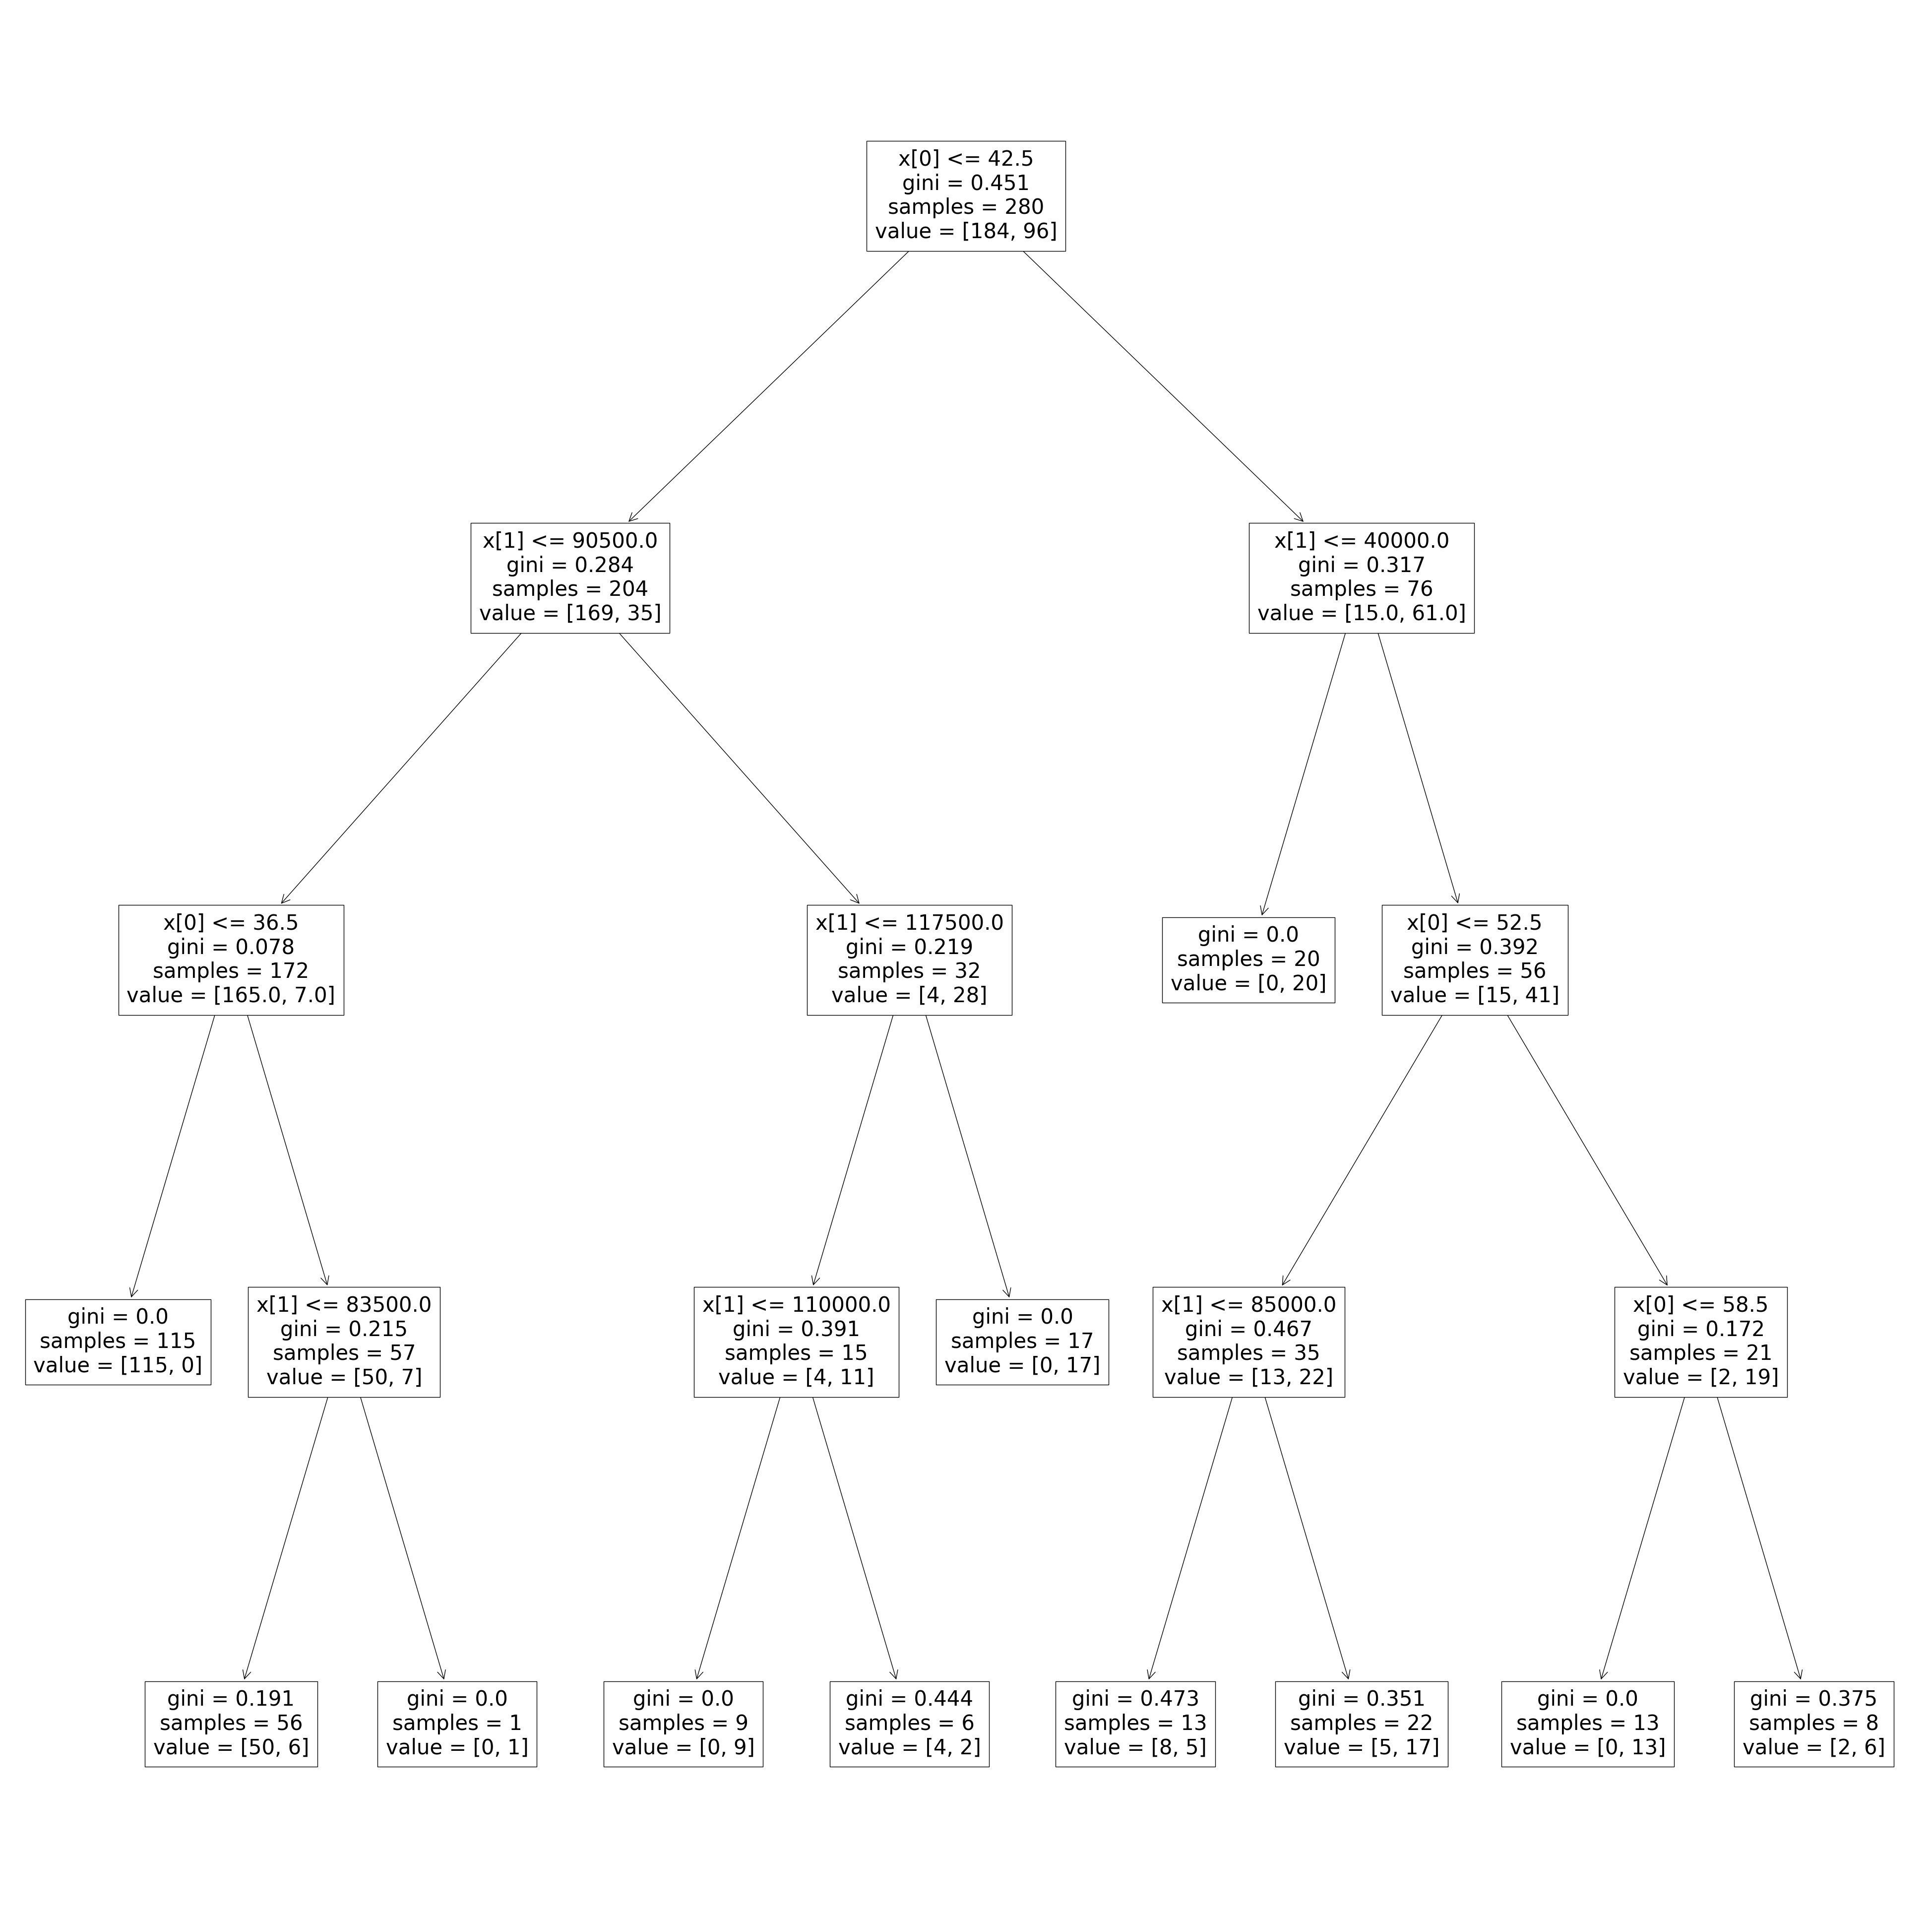

In [562]:
plt.figure(figsize=(50,50))
plot_tree(dt)
plt.show()

In [563]:
dt1=DecisionTreeClassifier(max_depth=4)


In [564]:
dt1=DecisionTreeClassifier(criterion='entropy')


In [565]:
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [566]:
dt1.score(x_test,y_test)*100

85.83333333333333

In [570]:
dt1.score(x_train,y_train)*100

99.64285714285714

# our model is overfitted because during traing score is 99 and in testing model is 85

In [575]:
dt1.predict([[19,19000]])

C:\Users\mishr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [577]:
dt1.predict([[46,41000]])

C:\Users\mishr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [579]:
# 46	41000	1

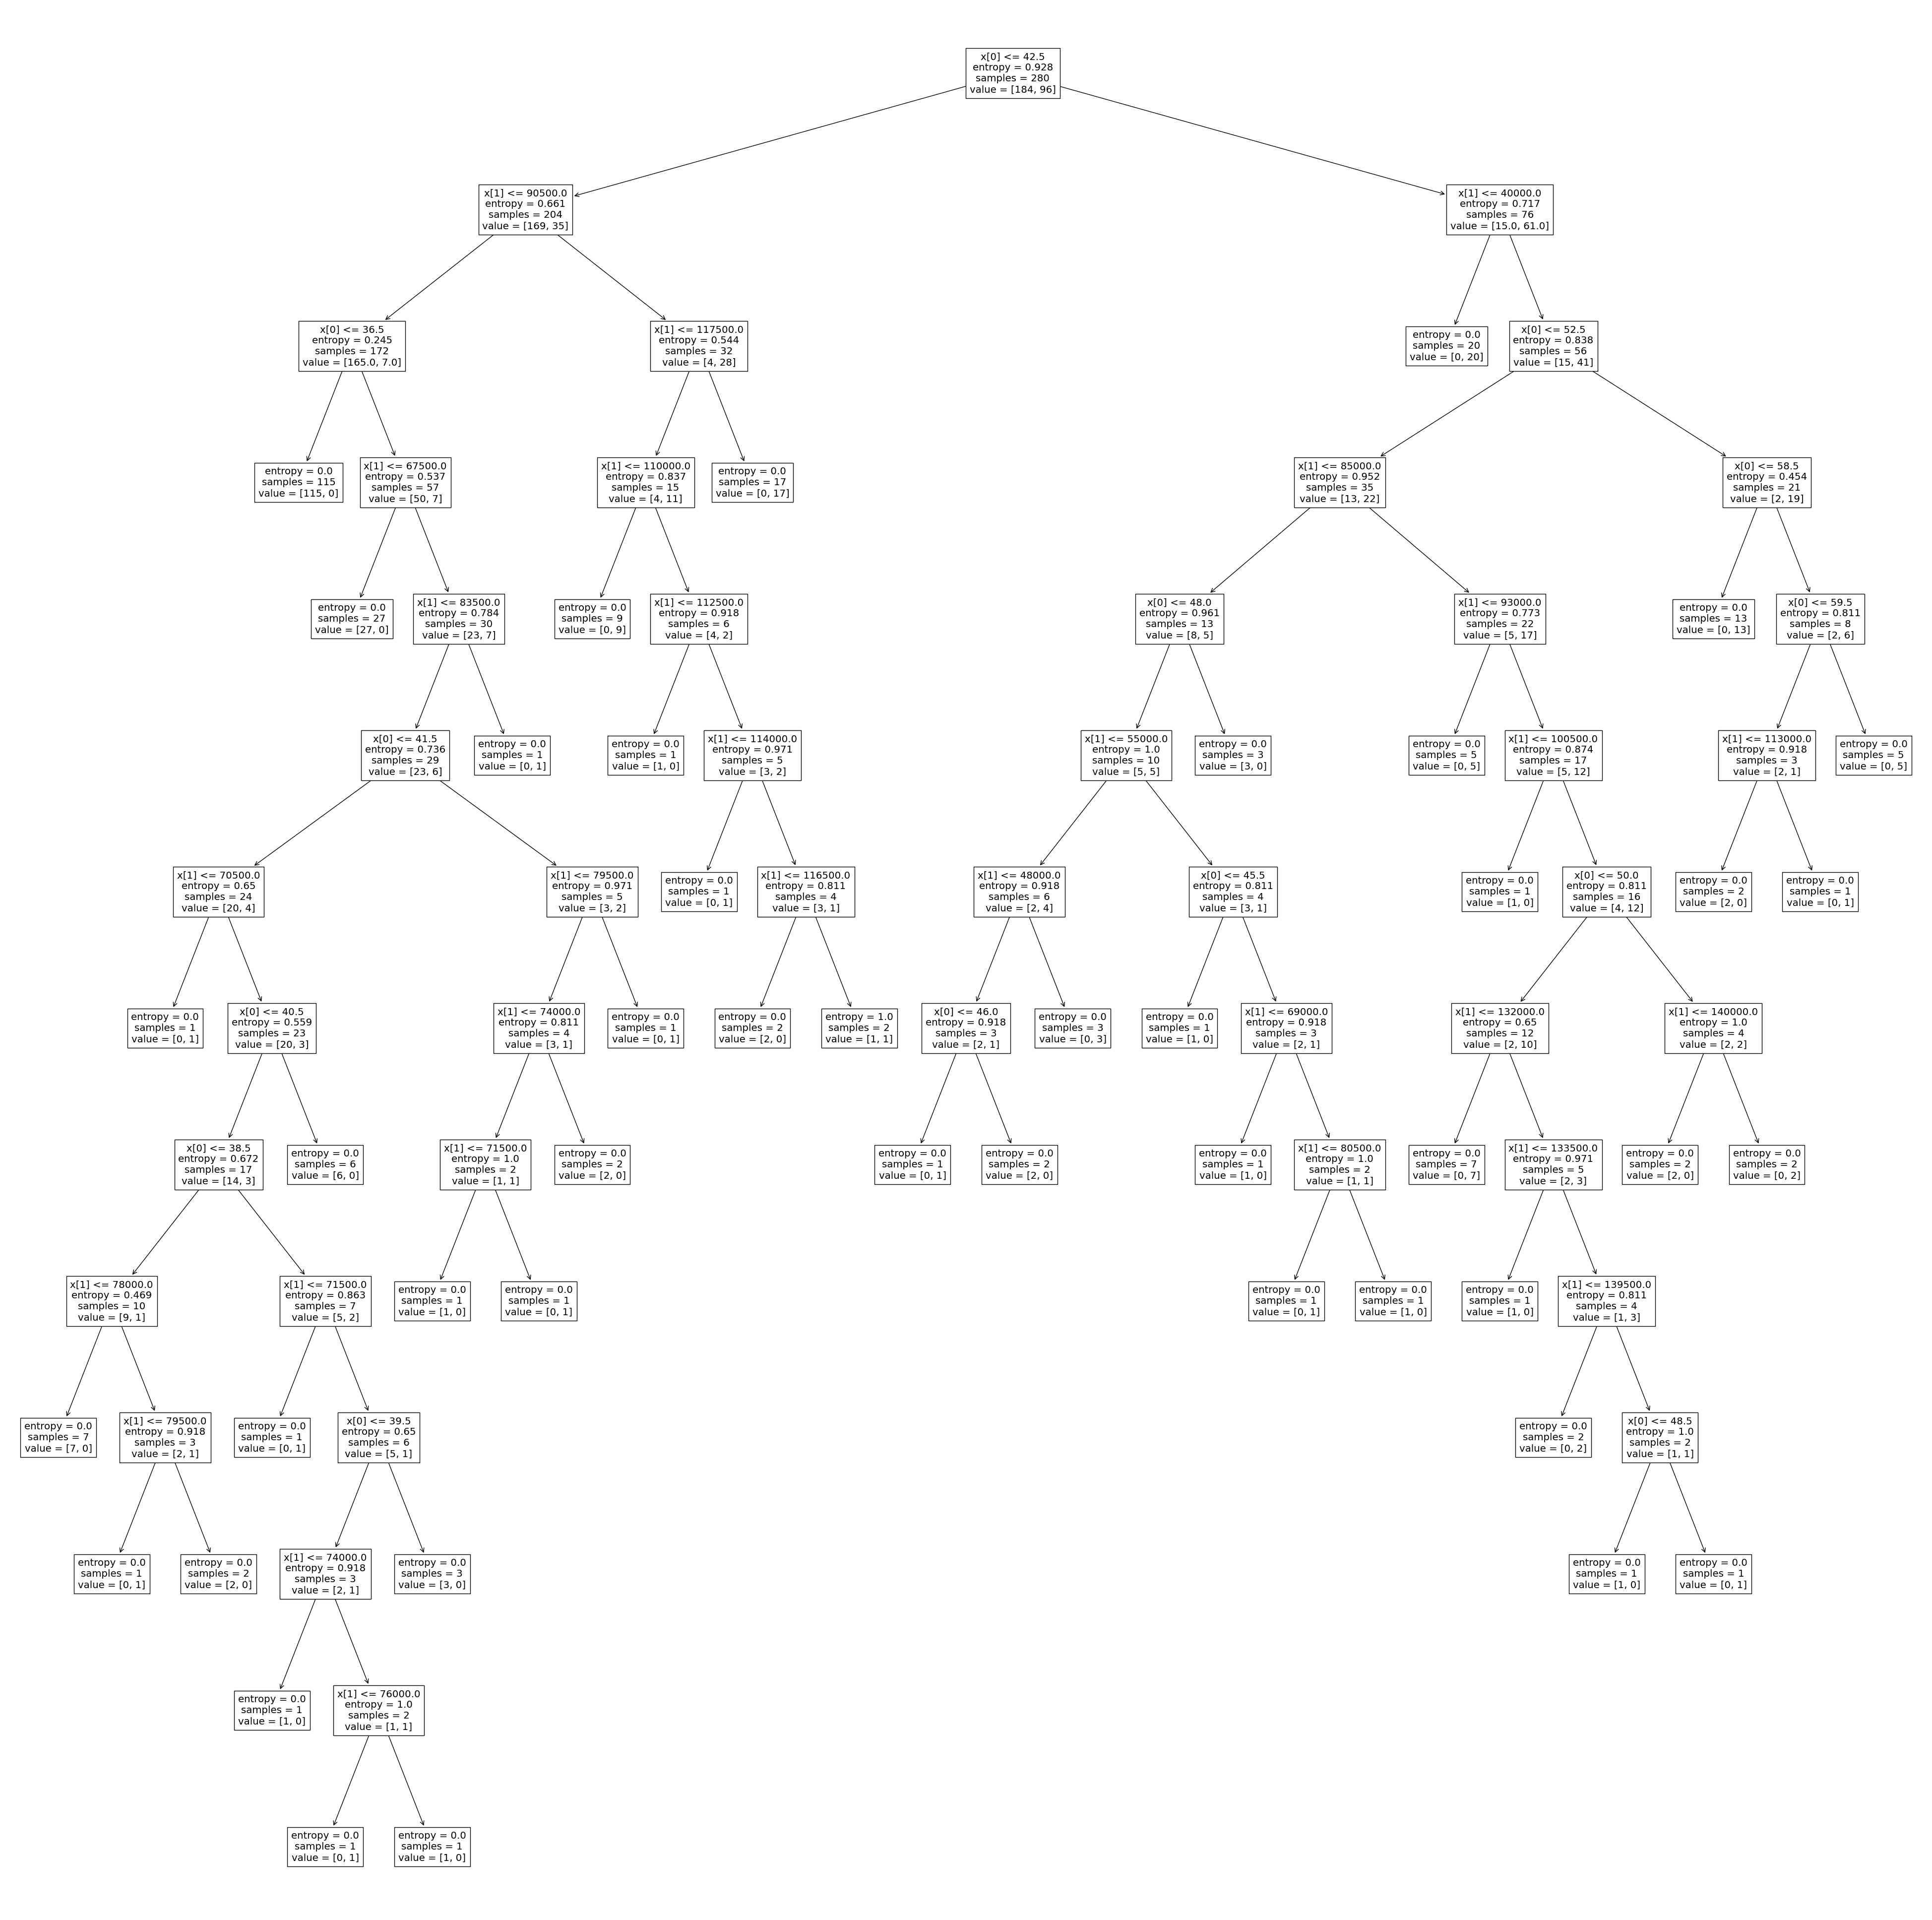

In [581]:
plt.figure(figsize=(50,50))
plot_tree(dt1)
plt.show()

In [583]:
from mlxtend.plotting import plot_decision_regions

C:\Users\mishr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


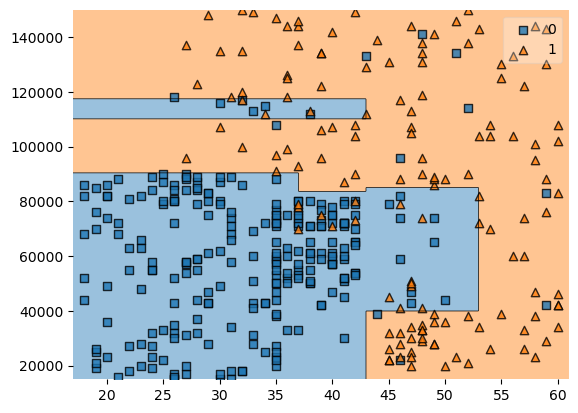

In [584]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show()

C:\Users\mishr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


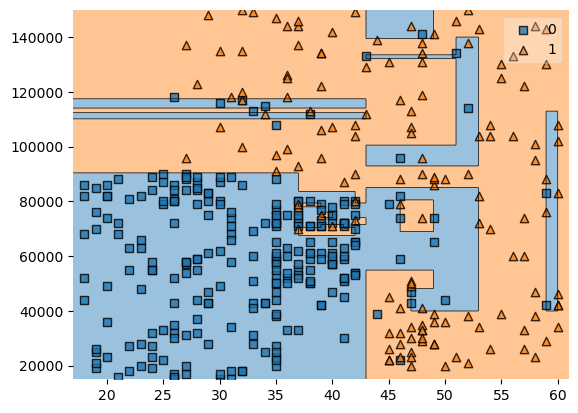

In [585]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt1)
plt.show()

In [587]:
# Make predictions
y_pred = dt.predict(x_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.925
Confusion Matrix:
 [[69  4]
 [ 5 42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        73
           1       0.91      0.89      0.90        47

    accuracy                           0.93       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.93      0.92       120



# Pre and Post Pruning in Decision Tree

In [591]:
for i in range(1,20):
   dt2=DecisionTreeClassifier(max_depth=i)
   dt2.fit(x_train,y_train)
   print(dt2.score(x_train,y_train),dt2.score(x_test,y_test),i)


0.8214285714285714 0.8833333333333333 1
0.9071428571428571 0.9333333333333333 2
0.9071428571428571 0.9333333333333333 3
0.9285714285714286 0.925 4
0.9321428571428572 0.8833333333333333 5
0.95 0.9083333333333333 6
0.9678571428571429 0.8666666666666667 7
0.9714285714285714 0.875 8
0.9857142857142858 0.875 9
0.9892857142857143 0.8583333333333333 10
0.9928571428571429 0.8583333333333333 11
0.9928571428571429 0.8666666666666667 12
0.9964285714285714 0.8583333333333333 13
0.9964285714285714 0.85 14
0.9964285714285714 0.8666666666666667 15
0.9964285714285714 0.8583333333333333 16
0.9964285714285714 0.8583333333333333 17
0.9964285714285714 0.8666666666666667 18
0.9964285714285714 0.8583333333333333 19
